In [1]:
import cairo
from IPython.display import Image, display, SVG
import seaborn as sns
from math import pi
import math
from io import BytesIO
import numpy as np

In [2]:
def draw_nested_inscribed_circle(cr, center, heading, radius, nsides, line_color, circle):
    cx, cy = center
    cr.move_to(*center)
    cr.stroke()
    white = line_color
    
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
        
    #circle outlines
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2            
        cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
        cr.set_source_rgba(*white)
        cr.stroke()


        last_x, last_y = this_x, this_y
    
    #c = cmap[0]
    
    #cr.set_source_rgba(*white)
    
    cr.move_to(*center)
    cr.stroke()
    if circle:
        cr.set_source_rgba(*white)
        cr.arc(*center, radius, 0, 2*pi)
        cr.stroke()
    

    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.set_source_rgba(*white)
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()

        last_x, last_y = this_x, this_y
        
def get_next_sets(cr, center, heading, radius, nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        init_hd = init_hd - math.radians(360/nsides/2)
    for i in range(nsides):
        cr.move_to(*center)
        x = center[0] + np.cos(init_hd + i * incr) * 0.5*radius
        y = center[1] + np.sin(init_hd + i * incr)*0.5*radius
        sets.append([(x,y), init_hd + i * incr])
    
    return sets    

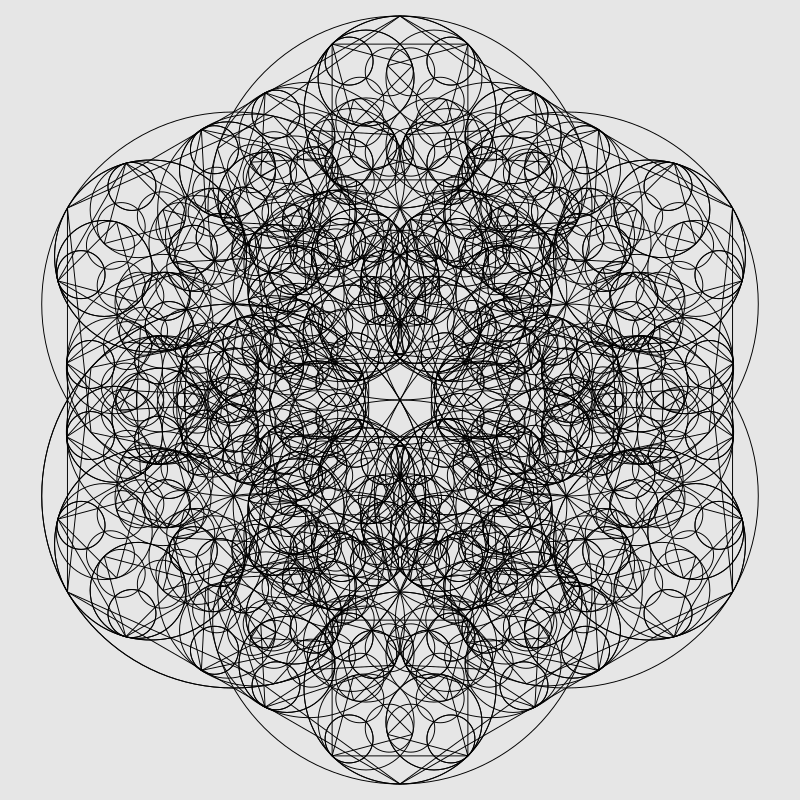

In [6]:
WIDTH = 800
HEIGHT = 800
nsides = 6 # number gte 3. Recommend 7 or less
heading = -pi #The direction in radians that the Apex of the center shape will point
draw_circles = True # whether to inscribe shapes in circles

radius = 0.48
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/400)




draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

sets = get_next_sets(ctx, (0.5, 0.5), heading, radius, nsides)
n_radius = radius/2
for s in sets:
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=n_radius, nsides=nsides-1, line_color=[0,0,0,1], circle=False, )
    next_sets = get_next_sets(ctx, s[0], s[1], next_radius, nsides-1)
    nn_radius = n_radius/2
    for t in next_sets:
        draw_nested_inscribed_circle(ctx, center=t[0], heading=t[1], radius=nn_radius, nsides=nsides-2, line_color=[0,0,0,1], circle=False, )
        nn_sets = get_next_sets(ctx, t[0], t[1], nn_radius, nsides-2)
        nnn_radius = nn_radius/2
        for z in nn_sets:
            draw_nested_inscribed_circle(ctx, center=z[0], heading=z[1], radius=nnn_radius, nsides=nsides-3, line_color=[0,0,0,1], circle=False, )
io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))